# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, I:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of my own 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
# Make necessary imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
# Read in readmissions data provided
df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df = df.copy(deep = True)

****
## Preliminary Analysis

In [15]:
# First 5 rows of the data
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [18]:
# Dealing with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Nishu\Anaconda3\Lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


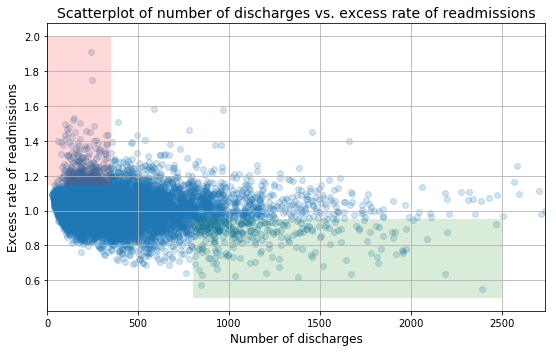

In [19]:
# Generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="alert alert-warning">
### Exercise

1. Do you agree with the above analysis and recommendations? Why or why not?
   
2. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   i. Setup an appropriate hypothesis test. <br>
   ii. Compute and report the observed significance value (or p-value).  <br>
   iii. Report statistical significance for $\alpha$ = .01.  <br>
   iv. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?  <br>
   v. Look at the scatterplot above.  <br> 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.
</div>
****

## Solutions

### 1. Do you agree with the above analysis and recommendations? Why or why not?


** A. Initial observations based on the plot above **
       
1. Overall, rate of readmissions is trending down with increasing number of discharges
2. With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
3. With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

** Response: **Looking at the scatterplot it's easy to agree with the inferences drawn from it. However, just eye-balling the data and drwing conclusions from it, doesn't mean that they are valid.

To create a more robust report, we have to perform a hypothesis test to verify if the variable of interest (`readmission rate`) is indeed statistically significant for different values of `Number of discharges`.

Also, criteria on which the shaded regions were chosen is not defined, making it difficult for us to agree with the report.

** B. Statistics: **

1. In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
2. In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [21]:
# Creating a copy of the data
df = clean_hospital_read_df.copy(deep = True)

In [57]:
# Dataframes with number of discharges 'n < 100' and 'n > 1000'
df_n100  = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100 ]
df_n1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

In [40]:
# First two rows of the filtered data
df_n100.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [58]:
# Dataframes with number of discharges 'n < 100' and 'n > 1000'; and 'excess readmission ratio > 1'
df_n100_r1  = df_n100[df_n100['Excess Readmission Ratio'] > 1 ]
df_n1000_r1 = df_n1000[df_n1000['Excess Readmission Ratio'] > 1]

In [42]:
# First two rows of the filtered data
df_n100_r1.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013


In [43]:
# Statistical measure of the filtered dataset - 1
print('Statistical Measures for `Number of Discharges` < 100:')
print('Mean ---- ', df_n100['Excess Readmission Ratio'].mean())
print('Percentage of Excess Readmission Ratio > 1 --- ', (len(df_n100_r1)/len(df_n100)*100))

Statistical Measures for `Number of Discharges` < 100:
Mean ----  1.0226183501683506
Percentage of Excess Readmission Ratio > 1 ---  59.18045705279747


In [44]:
# Statistical measure of the filtered dataset - 2
print('Statistical Measures for `Number of Discharges` > 1000:')
print('Mean ---- ', df_n1000['Excess Readmission Ratio'].mean())
print('Percentage of Excess Readmission Ratio > 1 --- ', (len(df_n1000_r1)/len(df_n1000)*100))

Statistical Measures for `Number of Discharges` > 1000:
Mean ----  0.9783354211663071
Percentage of Excess Readmission Ratio > 1 ---  44.49244060475162


**Response:** From the above statistical calculations, we note that the previously calculated measures were incorrect.

** C. Conclusions : **

1. There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
2. Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
3. No evidence is given for this significant correlation. Further, this supposed correlation is taken to be causation which is certainly inappropriate without further study and analysis. But we can quickly calculate the correlation between the two columns.

In [47]:
# Pearson correlation between the variables of interest
df[['Number of Discharges', 'Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


From the pearson correlation matrix, we see that a negative correaltion exists between `number of discharges` and `readmission rate`. However, -0.09 is not a significant correlation betwwen the two variables. Hence, the conclusion from the above report there is a significant correlation betwwen `hospital capacity` and `readmission rate` is <strong> invalid </strong>.

** D. Regulatory policy recommendations: **

1. Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
2. Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

**Response:** The definition of a <strong> small hospital </strong> is not defined appropraitely. Various thresholds (100, 300 and 1000) have been used to define the characteristics of a small hospital. Without a proper definition, it would not be valid to generalize the findings.

## 2. Conduct a statistically sound analysis

In [49]:
from scipy.stats import normaltest
import seaborn as sns
sns.set_style()

### (i) Check for normality of distributions

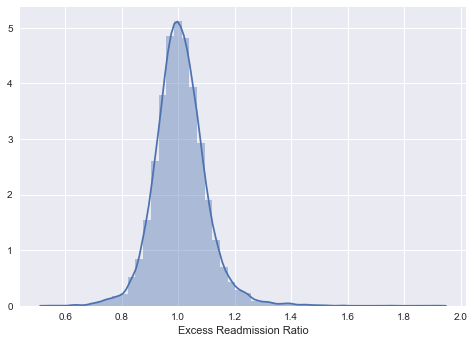

In [51]:
# Distribution of 'Excess Readmission Ratio'
sns.distplot(df['Excess Readmission Ratio'].dropna())

We see from the above plot that the slightly skewed to the right

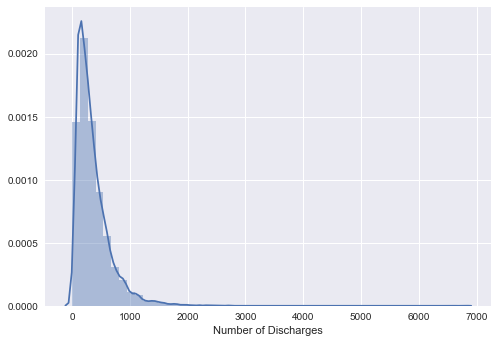

In [50]:
# Distribution of 'Number of Discharges'
sns.distplot(df['Number of Discharges'])

The above distribution plot is highly skewed to the right

**Response:** From the above plots, it is evident to conclude that the distribution is not normal.

### (ii) Setup an appropiate hypothesis test

**NULL HYPOTHESIS:** There is no difference in the mean Excess Readmission Ratio in hospitals with discharges <=100 and hospitals with discharges > 1000. 

<center>[ H<sub>0</sub>: µ<sub>1</sub> = µ<sub>2</sub> ] </center>

**ALTERNATE HYPOTHESIS:** There is a significant difference in the mean Excess Readmission Ratio in hospitals with discharges <=100 and hospitals with discharges > 1000

<center>[ H<sub>A</sub>: µ<sub>1</sub> ≠ µ<sub>2</sub> ] </center>

In [53]:
import math
import scipy.stats as stats
import statsmodels.stats.api as mod

In [60]:
# Function to draw permutation samples from two datsets
def permutation_sample(data1, data2):
    
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)

    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [61]:
# Calculation permutation replicates from the two samples
def draw_perm_reps(data_1, data_2, func, size=1):

    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [62]:
# Function to calculae the difference in means of the two datasets
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [64]:
# Theoretical Differences of means
df_e100 = df_n100['Excess Readmission Ratio']
df_e1000 = df_n1000['Excess Readmission Ratio'] 
df_e = np.concatenate((df_e100, df_e1000))

print('Theoretical mean of discharge rate less than 100 is ', np.mean(df_e100))
print('Theoretical mean of discharge rate more than 1000 is ', np.mean(df_e1000))

Theoretical mean of discharge rate less than 100  1.0226183501683506
Theoretical mean of discharge rate more than 1000  0.9783354211663071


In [65]:
empirical_diff_means = diff_of_means(df_e100, df_e1000)
print('Empirical difference of means is ', empirical_diff_means)

Empirical difference of means is  0.04428292900204345


In [101]:
# Permutation replicates and p-value

perm_replicates = draw_perm_reps(df_e100, df_e1000, diff_of_means, size = 10000)

p = np.sum(perm_replicates >= empirical_diff_means) / (len(perm_replicates))

print('p-value is ', p)

p-value is  0.0


**Response:** The value of p is significantly low. Hence, we conclude that we have significant evidence to reject the null hypothesis.

### (iii) Report the observed p-value value,  statistical significance for alpha = 0.01

In [102]:
# p-value and sem for filtered dataset 1
std_error_1 = stats.sem(df_e100)
stats.t.interval(0.99, len(df_e100) - 1, loc = np.mean(df_e100), scale = std_error_1)

(0.96390988455153725, 0.99276095778107698)

In [78]:
# p-value and sem for filtered dataset 2
std_error_2 = stats.sem(df_e1000)
stats.t.interval(0.99, len(df_e1000) - 1, loc = np.mean(df_e1000), scale = std_error_2)

(0.96390988455153725, 0.99276095778107698)

**Response: **Statistically these numbers are not equal but pratically they are very close to each other.

### (iv) Discuss statistical significance vs. practical significance. Do they differ here?

Statistical significance is relies on a statistical measures (p-value) for significance while practical significance considers "other factors" and thinking logically in the context of real-world.

Looking at the hospitals with the greater number of discharges, on a average they had higher readmissions than the ones with average number of discharges.

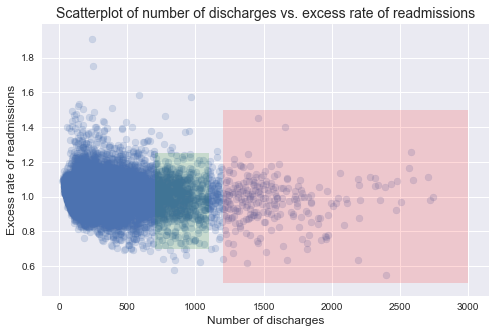

In [88]:
# Previously plotted scatter plot
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)


ax.set_xlabel('Number of discharges', fontsize = 12)
ax.set_ylabel('Excess rate of readmissions', fontsize = 12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize = 14)

ax.fill_between([700,1100], .7, 1.25, facecolor = 'green', alpha = .15, interpolate = True)
ax.fill_between([1200,3000], .5, 1.5, facecolor = 'red', alpha = .15, interpolate = True)

### (iv) How does this change the recommendation?

Statistical calculations on just a few variables are not enough to draw conclusions from it.

Other factors such as `reputation`, `average experience of the doctors` and `location` can  also improve out chances of drawing more valid conclusions.

### (v) Critically evaluate & reproduce the plot above.

#### 1. What are the advantages and disadvantages of using this plot to convey information?

**Advantages:**
1. Helps understand the correlation between two variables
2. Conveys the `relative` density of the data points

**Disadvantages:**
1. Too much information in too less space (not ideal if the density of the obeservations is very high) 
2. Hard to figure the distribution underlying the data.

In [91]:
df_n100.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

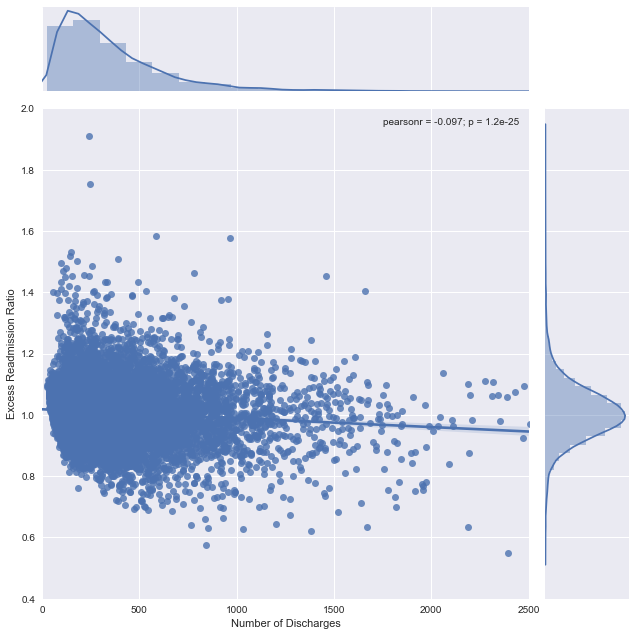

In [99]:
# Joint plot between the variables of interest
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data = df, kind = 'reg', size = 9, 
              xlim=(0,2500), ylim=(0.4,2.0))

**Note:** From the jointplot, we not only can see the distributions of the variables; it also displays the `pearsonr` and `p-value` with for a 95% confidence interval.